# PyTASER Example


The example given below uses electronic structure information from the Materials Project database. They require an API key that you can get from https://materialsproject.org/open



As the database is built from density functional theory (DFT) calculations using a semi-local exchange-correlation functional, the band gaps are underestimated, so we apply a scissors operator to recover the experimental bandgap. This is necessary to directly compared predicted and modelled spectra.

## Setup

In [8]:
from pytaser import generator, plotter
%pylab inline

key = ''  # insert your own Materias Project key

Populating the interactive namespace from numpy and matplotlib


## GaAs

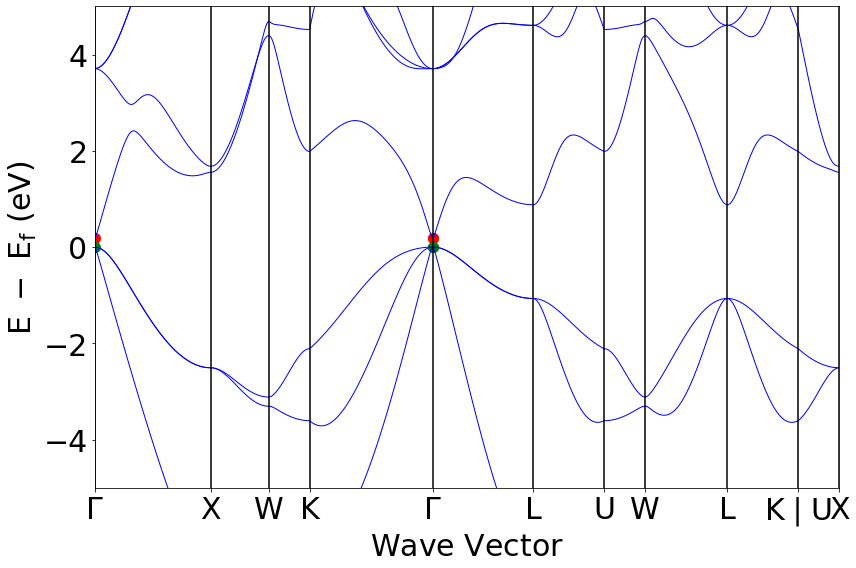

In [7]:
#Band structure read from pymatgen 
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
a = MPRester(key)
bs = a.get_bandstructure_by_material_id("mp-2534")

from pymatgen.electronic_structure.plotter import BSPlotter
plt = BSPlotter(bs).get_plot(vbm_cbm_marker=True,ylim=[-5,+5])

/Users/aron/opt/anaconda3/lib/python3.7/site-packages/pymatgen/electronic_structure/dos.py:1016: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((E - fermi) / (_cd("Boltzmann constant in eV/K") * T)))
/Users/aron/Documents/github/PyTASER/pytaser/plotter.py:8: RuntimeWarning: divide by zero encountered in true_divide
  wavelength = ((scpc.h * scpc.c) / (ev * scpc.electron_volt)) * 10e8


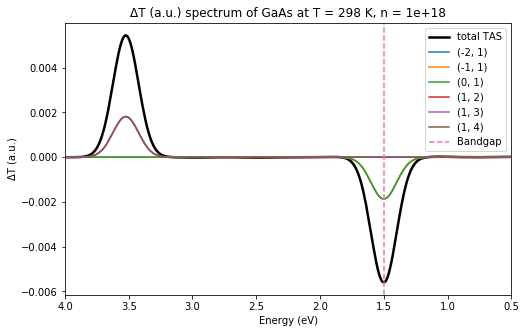

In [11]:
# Setting values
temp = 298 # temperature in Kelvin
conc = 1e18 # carrier concentration per cm3 
bandgap = 1.5 # eV, standard value at T = 300 K

# Run pyTASER
data = generator.TASGenerator.from_mpid("mp-2534", bandgap, api_key=key)
process = data.generate_tas(temp, conc)
plot = plotter.TASPlotter(process, bandgap, material_name="GaAs", temp=temp, conc=conc)

# Output energy plot 
energyplot = plot.get_plot(
    xaxis="energy", transition_cutoff=0.03, xmin=0.5, xmax=4, yaxis="tas")
# Reverse axis for better comparison tp experiment
energyplot.gca().invert_xaxis()

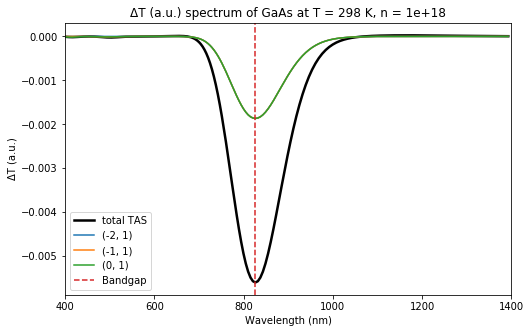

In [12]:
# Output wavelength plot
wavelengthplot = plot.get_plot(
   xaxis="wavelength", transition_cutoff=0.03, xmin=400, xmax=1400, yaxis="tas")